# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 14. Data Visualization (part 1)

### Date: October 10, 2023

### To-Dos From Last Class:

* Work on Assignment #3
* Install R
    
### Today:

* RStudio (.R, .Rmd)
* Tidyverse & ggplot
    * For additional reading, see <a href='https://r4ds.had.co.nz/'>R for Data Science</a> and <a href="https://www.moderndive.com/">Statistical Inference via Data Science</a>
* Play around with a sample dataset

### Homework

* Submit Assignment #3: <a href="https://www.dropbox.com/request/ggV5rAg3J9T0YxpEHLqX">Data Wrangling</a> (before 10/10, 23:00 MDT)

# RStudio

* R is a language, RStudio is an Integrated Development Environment (IDE)
    * R : RStudio :: Python : Spyder

<img src='img/r_vs_rstudio.png' width='600'>

## Rmarkdown

* .R files --> Basic R scripts written and executed in RStudio
* .Rmd files --> RMarkdown files merging markdown and code chunks (similar to Jupyter)

# What is `tidyverse`?

## Definition

* Set of R packages
    * Includes ggplot, dplyr, tidyr, etc.
* All packages share an underlying design philosophy, grammar, and data structures.
    * <a href="https://www.tidyverse.org">For more info</a>
    
## Why do I use it?

* ggplot
* Most of the inferential modeling I do is in R
    * Nearly all of these modeling functions play nicely with tidy data frames


# Wading into the tidyverse...

## Reading in and interpreting a simple dataset

* Dataset contains the body mass index (BMI) of 1786 people, together with the number of steps each of them took on a particular day.
* Stored in two files: one for chronic stroke patients, one for age-matched controls.

## Step #1:
* Reading in the data
    * Coding diagnosis as a variable
    * Merging the data frames

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [11]:
# setting up filepaths
# d_code <- getwd()
# print(d_code)

d_base <- '/Users/jeremyhogeveen/Dropbox/Fall_2023/teaching/PSY450_650/DSPN_Fall2023_Git/misc/data_visualization_exercise'

# filenames
f_patients <- paste(d_base,'data_patients.txt',sep='/')
print(f_patients)
f_controls <- paste0(d_base,'/data_controls.txt')
print(f_controls)

[1] "/Users/jeremyhogeveen/Dropbox/Fall_2023/teaching/PSY450_650/DSPN_Fall2023_Git/misc/data_visualization_exercise/data_patients.txt"
[1] "/Users/jeremyhogeveen/Dropbox/Fall_2023/teaching/PSY450_650/DSPN_Fall2023_Git/misc/data_visualization_exercise/data_controls.txt"


In [14]:
# Reading in the data frames
df_patients <- read_tsv(f_patients) 
df_patients <- mutate(df_patients,Dx=1)
df_controls <- read_tsv(f_controls) %>%
    mutate(Dx=0)

# merging the data frames together
df <- bind_rows(df_patients,df_controls)
print(df)

Rows: 921 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): ID, steps, bmi

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 865 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): ID, steps, bmi

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,786 × 4
      ID steps   bmi    Dx
   <dbl> <dbl> <dbl> <dbl>
 1     3 15000  17       1
 2     4 14861  17.2     1
 3     5 14861  17.2     1
 4     9 14699  16.8     1
 5    12 14560  20.4     1
 6    14 14560  20.5     1
 7    15 14560  20.5     1
 8    16 14560  20.5     1
 9    21 14560  19.7     1
10    23 14560  19.6     1
# ℹ 1,776 more rows


## Step #2:
* Testing whether there is a statistically significant difference in the average number of steps taken by controls and patients
    * Run a t-test
    * Plot in a boxplot


	Welch Two Sample t-test

data:  steps by Dx
t = 6.8441, df = 1778, p-value = 1.055e-11
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
  800.9513 1444.3903
sample estimates:
mean in group 0 mean in group 1 
       8013.908        6891.237 



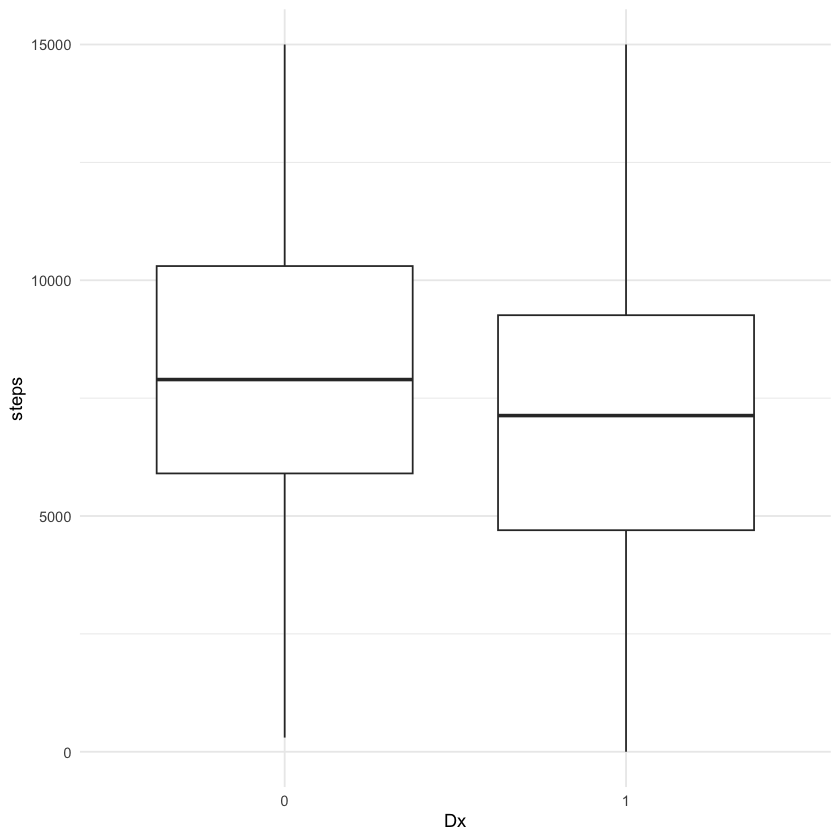

In [20]:
# test hypothesis
m_hypothesis1 <- t.test(steps ~ Dx, df, paired = FALSE)
print(m_hypothesis1)

# plotting the data in a scatterplot by group
df <- df %>%
    mutate(Dx = as.factor(Dx))

ggplot(df,aes(x = Dx, y = steps)) +
    geom_boxplot() +
    theme_minimal()

## Step #3:
* Testing that there is a negative correlation between the number of steps and the BMI for stroke patients
    * Run a cor test

In [23]:
m_hypothesis2 <- cor.test(df_patients$steps,df_patients$bmi,method="pearson") #,method="spearman"
print(m_hypothesis2)


	Pearson's product-moment correlation

data:  df_patients$steps and df_patients$bmi
t = -9.968, df = 919, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3695032 -0.2528646
sample estimates:
       cor 
-0.3123607 



## Step #4:
* Testing that there is also a negative correlation between steps and BMI in controls
    * Run a cor test

In [24]:
m_hypothesis3 <- cor.test(df_controls$steps,df_controls$bmi,method="pearson") #,method="spearman"
print(m_hypothesis3)


	Pearson's product-moment correlation

data:  df_controls$steps and df_controls$bmi
t = -6.9541, df = 863, p-value = 7.006e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2925195 -0.1662485
sample estimates:
       cor 
-0.2303534 



# Step #5:

* Visualizing the data

`geom_smooth()` using formula = 'y ~ x'


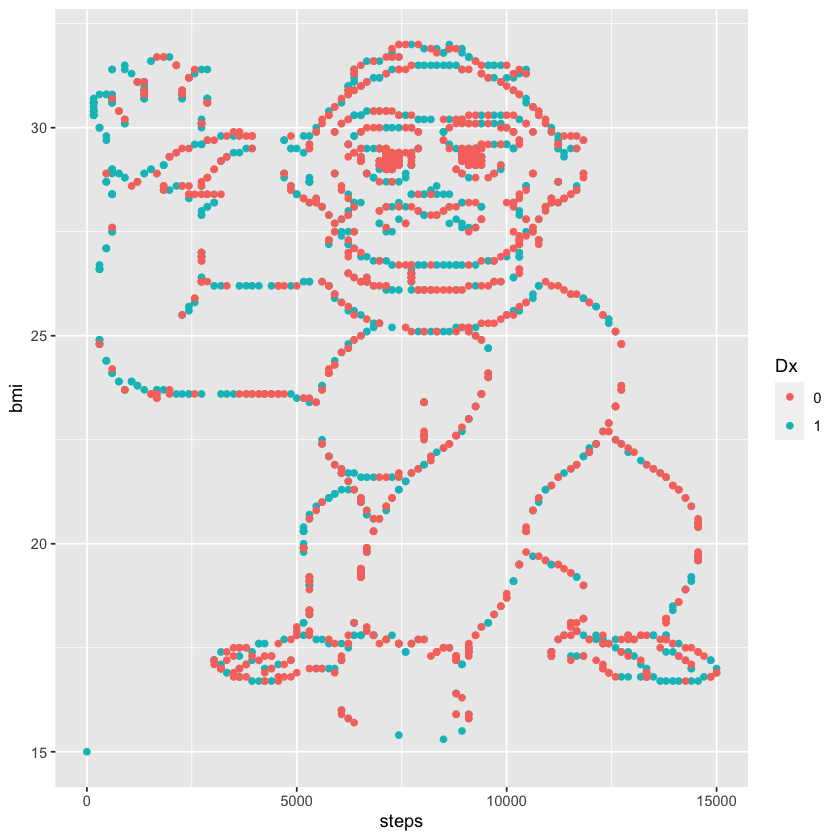

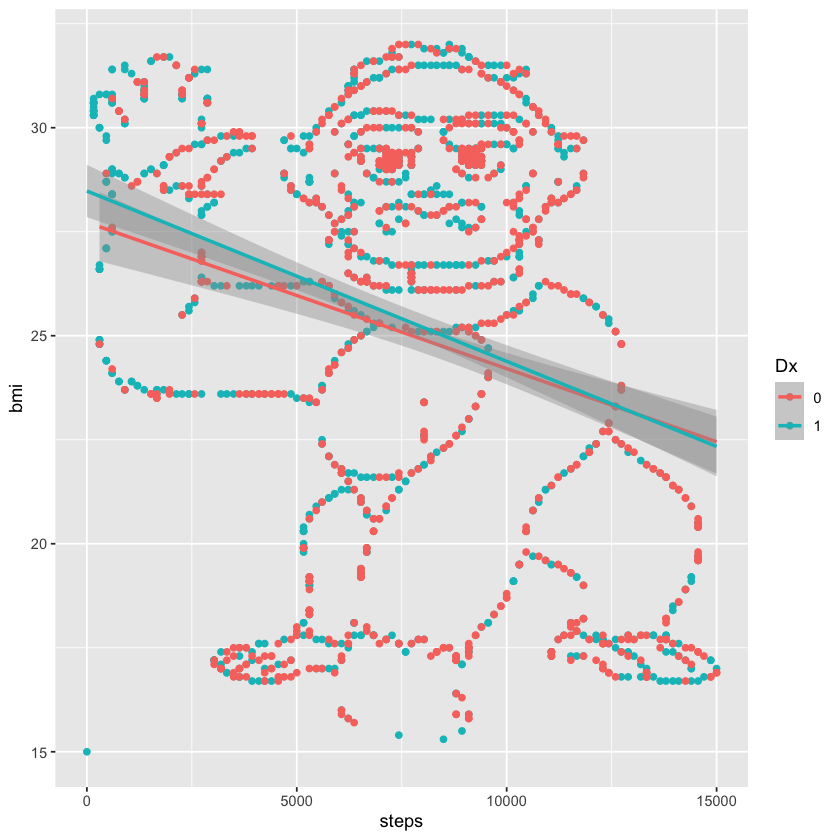

In [27]:
ggplot(df,aes(x = steps, y = bmi, color = Dx)) +
    geom_point()

ggplot(df,aes(x = steps, y = bmi, color = Dx)) +
    geom_point() +
    geom_smooth(method='lm')

# Lesson: Step #5 should've been Step #1

# Example courtesy:

* Yanai, I., & Lercher, M. (2020). <a href='https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w'>A hypothesis is a liability.</a>